In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
import random
# load data set

df = pd.read_csv('/content/drive/My Drive/dataset_NDoE_main_new.csv',sep=',',header=None)
data = df.values

# split into inputs and outputs
X_input = data[:, :6]
y_input = data[:,6: ]
# create copies for comparison
y_input_original = y_input
X_input_original = X_input
# set colors for CLD plots
colors = ['black','red', 'blue']

### Pre-processing of data

In [ ]:
# find outliers in data
ysum = y_input[:,0]+y_input[:,1]
wrongdata = np.argwhere(ysum > 0.5).reshape(1,-1)

z = np.sum(y_input, axis=1)
wrongdata1 = np.argwhere(z < 2).reshape(1,-1)

wrongdata_total = np.append(wrongdata,wrongdata1)

# remove outliers
y_input = np.delete(y_input, wrongdata_total, 0)
X_input = np.delete(X_input, wrongdata_total, 0)
print(y_input.shape,X_input.shape)
# split the data set into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_input, y_input, test_size=0.3, 
    random_state=2
)

(917, 120) (917, 6)


In [ ]:
# print shape of X and y before outlier removal
print(y_input_original.shape,X_input_original.shape)

(960, 120) (960, 6)


### Plot outlier statistics 

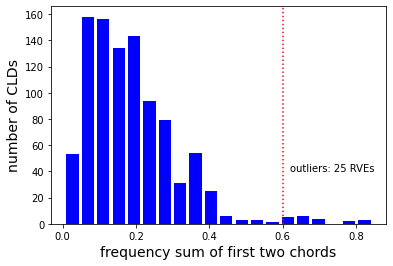

In [ ]:
plt.hist(data[:,6]+data[:,7], bins=20,histtype = 'bar',color='blue',align='mid',rwidth=0.8)
plt.axvline(x=0.6,c='r',ls=':')
plt.text(0.62,40,'outliers: %d RVEs'%wrongdata.shape[1])
plt.xlabel('frequency sum of first two chords', fontsize=14)
plt.ylabel('number of CLDs', fontsize=14)
plt.savefig("statistics1.png")

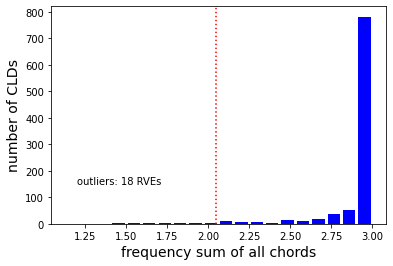

In [ ]:
plt.hist(z, bins=20,histtype = 'bar',color='blue',align = 'mid',rwidth=0.8)
plt.axvline(x=2.05,c='r',ls=':')
plt.text(1.2,150,'outliers: %d RVEs'%wrongdata1.shape[1])
plt.xlabel('frequency sum of all chords', fontsize=14)
plt.ylabel('number of CLDs', fontsize=14)
plt.savefig("statistics2.png")

# plot CLD with corrosponding process parameters

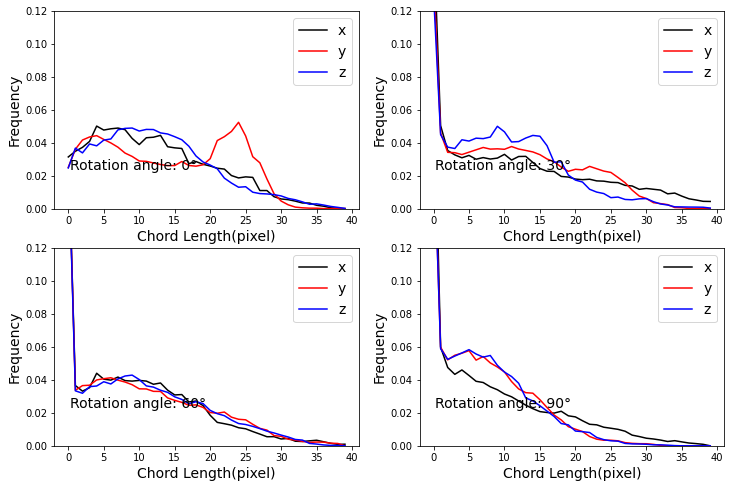

In [ ]:
# influence of rotation angle on CLDs

c = [0,320,480,719]
n = [0,30,60,90]
strlabel = ['x','y','z']
fig, axs = plt.subplots(2,2, figsize=(12, 8), facecolor='w', edgecolor='k')
z=0
for i in range(2):
    
    for j in range(2):
        structurenumber='Rotation angle: %d°'%(n[z])
        for d in range(3):
            axs[i,j].plot(range(40),y_input_original[c[z],:].reshape(3,40)[d,:],
                          label=strlabel[d], color=colors[d]
                         )
        axs[i,j].legend(loc = 'upper right',prop={'size': 14})
        axs[i,j].set_ylabel('Frequency',fontsize=14)
        axs[i,j].set_xlabel('Chord Length(pixel)',fontsize=14)
        axs[i,j].text(0.05, 0.25, structurenumber,transform=axs[i,j].transAxes,
               fontsize=14, verticalalignment='top')
        axs[i,j].set_ylim(0,0.12)
        z=z+1
plt.savefig("rotation_angles.png")

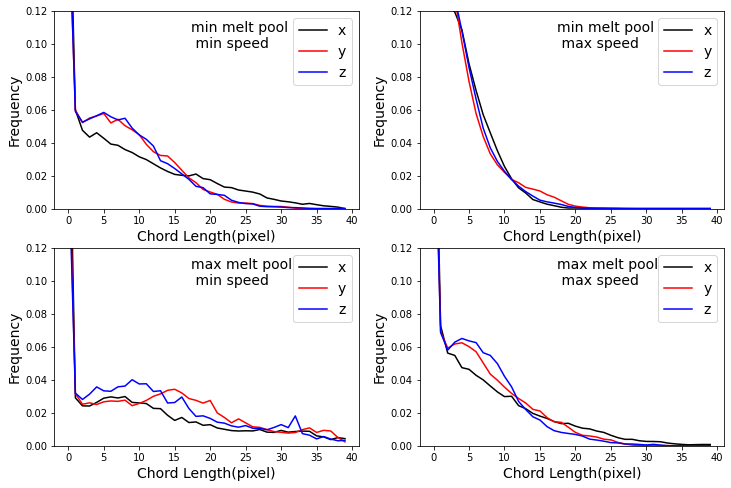

In [ ]:
# influence of melt pool size and speed on CLDs

c = [719,768,920,958]
n = [0,30,60,90]
strlabel = ['x','y','z']
structurenumber =['min melt pool \n min speed','min melt pool \n max speed','max melt pool \n min speed','max melt pool \n max speed']
fig, axs = plt.subplots(2,2, figsize=(12, 8), facecolor='w', edgecolor='k')
z=0
for i in range(2):
    for j in range(2):
        for d in range(3):
            axs[i,j].plot(range(40),y_input_original[c[z],:].reshape(3,40)[d,:],
                          label=strlabel[d],color=colors[d]
                         )
        axs[i,j].legend(loc='upper right',prop={'size': 14})
        axs[i,j].set_ylabel('Frequency',fontsize=14)
        axs[i,j].set_xlabel('Chord Length(pixel)',fontsize=14)
        axs[i,j].text(0.45,0.95,structurenumber[z],transform=axs[i,j].transAxes,
               fontsize=14, verticalalignment='top')
        axs[i,j].set_ylim(0,0.12)
        z=z+1
plt.savefig("melt_pool_and_speed.png")

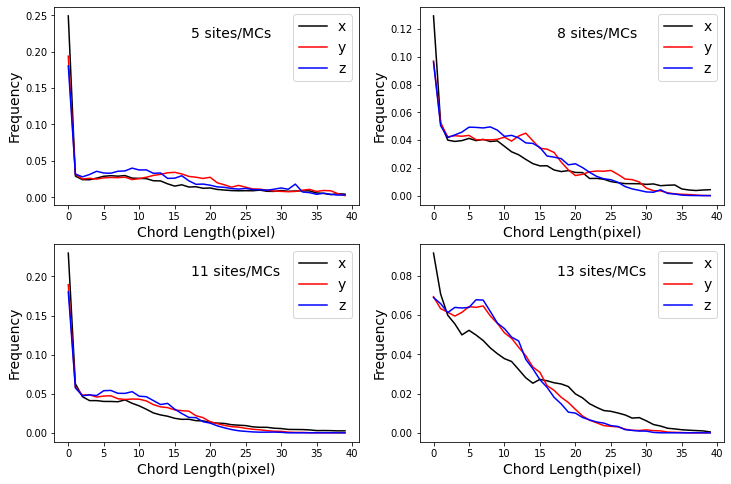

In [ ]:
# influence of scanning speed on CLDs

c = [920,932,944,957]
strlabel = ['x','y','z']
structurenumber =['5 sites/MCs','8 sites/MCs','11 sites/MCs','13 sites/MCs']
fig, axs = plt.subplots(2,2, figsize=(12, 8), facecolor='w', edgecolor='k')
z=0
for i in range(2):  
    for j in range(2):
        for d in range(3):
            axs[i,j].plot(range(40),y_input_original[c[z],:].reshape(3,40)[d,:],
                          label=strlabel[d],color=colors[d]
                         )
        axs[i,j].legend(loc='upper right',prop={'size': 14})
        axs[i,j].set_ylabel('Frequency',fontsize=14)
        axs[i,j].set_xlabel('Chord Length(pixel)',fontsize=14)
        axs[i,j].text(0.45,0.9,structurenumber[z],transform=axs[i,j].transAxes,
               fontsize=14,verticalalignment='top')
        z=z+1
plt.savefig("speed.png")

### the probability distribution function $P_i = \frac{N_i l_i}{\sum^n_{i=1}{N_i l_i}}$

$i$ is the enumerates chord length bin

$N_i$ is the chords numer sampled in the interval of $i$th. chord length bin

$l_i$ is the chord length, here takes average/center value in the interval of $i$th. chord length bin

$P_i$ is the probability to find a voxel belongs to a chord length of $l_i$

# Dimensionality reduction by linear PCA

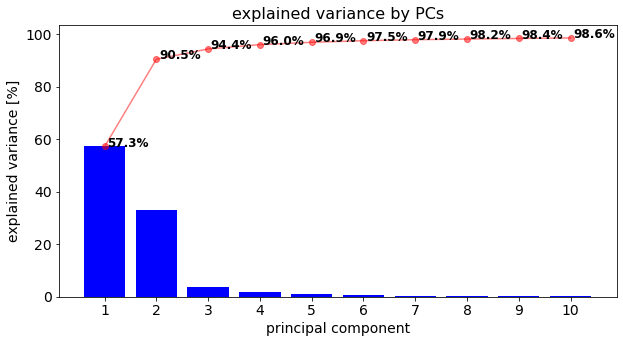

In [ ]:
# run the pca decomposition

pca = PCA(n_components=10)
pca.fit(y_train)
y_train_pca = pca.transform(y_train)

#plot the pca result
fig = plt.figure(figsize=(10,5))

#preparing the data for the plot
n_comp = np.arange(1,y_train_pca.shape[1]+1,1)
cumsum = (pca.explained_variance_ratio_*100).cumsum()

#plot the explained varience and its sum
ax1 = plt.gca()
ax1.bar(n_comp, pca.explained_variance_ratio_*100,color='blue')
ax1.plot(n_comp, cumsum, '-ro', alpha=0.5)

#label the x-axis and y-axis
ax1.set_xlabel('principal component', fontsize=14)
ax1.set_ylabel('explained variance [%]',fontsize=14)
ax1.set_title('explained variance by PCs',fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
plt.xticks(np.arange(1,11,1))
#add the text label of the cumsum

formatted_weights = ['{:,.1%}'.format(x/100) for x in cumsum]
for i, txt in enumerate(formatted_weights):
    ax1.annotate(txt, (n_comp[i]+0.05, cumsum[i]), fontweight='heavy',fontsize=12)

plt.savefig("PCA_explained.png")    

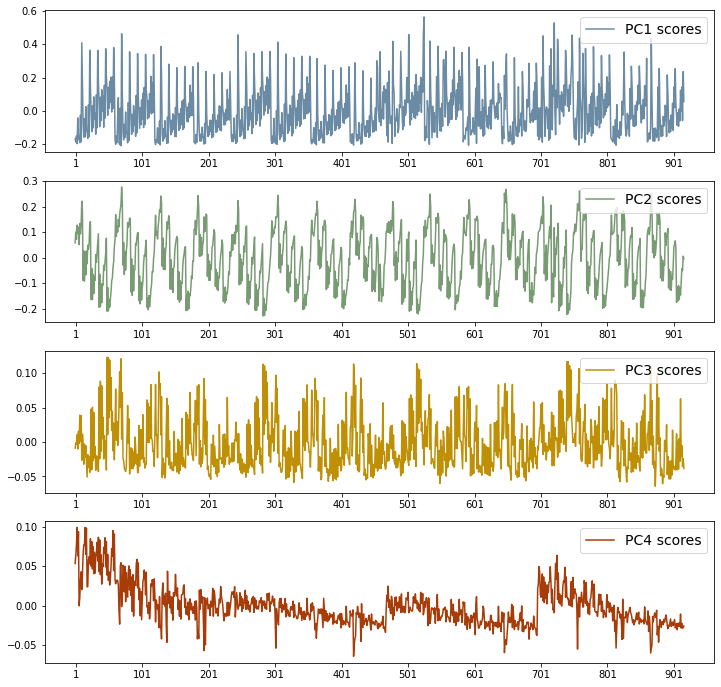

In [ ]:
# plot the scores of the transformed input data for PC1-PC4

y_input_pca = pca.transform(y_input)
color=['#6b8ba4','#789b73','#bf9005','#a83c09']
fig, axs = plt.subplots(4,1, figsize=(12, 12), facecolor='w', edgecolor='k')
number=int(y_input_pca.shape[0])
for i in range(4):
    axs[i].plot(np.arange(number),y_input_pca[:number,i],color[i], label='PC%d scores'%(i+1))
    axs[i].legend(loc='upper right',prop={'size': 14})
    axs[i].set_xticks(np.arange(1,number,100))


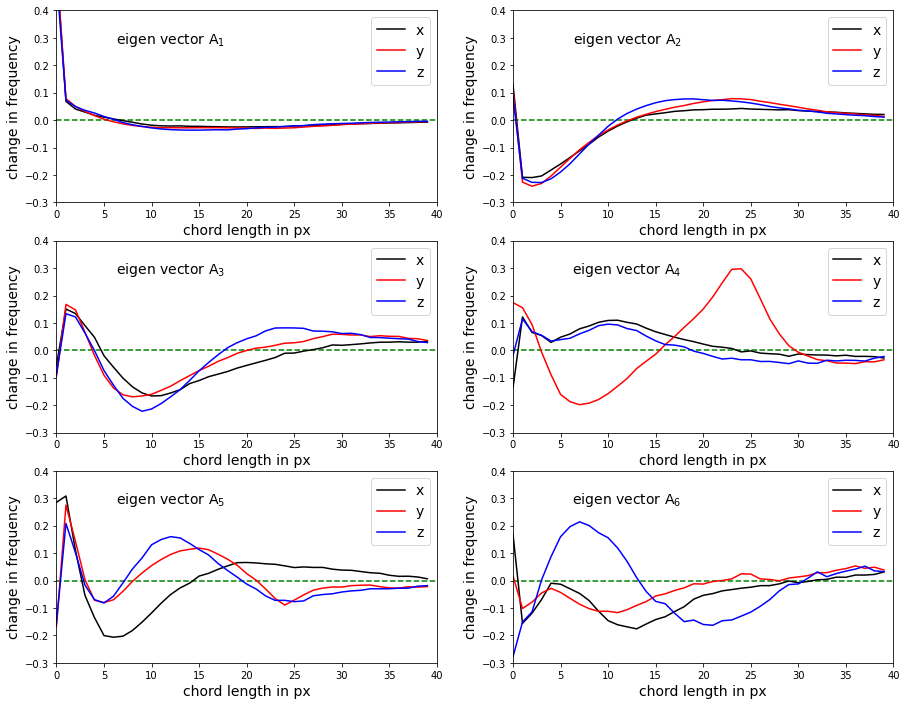

In [ ]:
# plot the principal basis (eigen vectors)

y_pca_PC = pca.components_
fig, axs = plt.subplots(3,2, figsize=(15, 12), facecolor='w', edgecolor='k')
strlabel = ['x','y','z']
CLD_length =int(y_pca_PC.shape[1]/3)
c = 0
for i in range(3):
    for k in range(2):
        for j in range(3):
            axs[i,k].plot(range(CLD_length),y_pca_PC[c,:].reshape(3,CLD_length)[j,:],label=strlabel[j],color=colors[j]) 
        c = c+1
        axs[i,k].legend(loc = 'upper right',prop={'size': 14})
        axs[i,k].set_ylabel('change in frequency',fontsize=14)
        axs[i,k].set_xlabel('chord length in px',fontsize=14)
        axs[i,k].text(0.3,0.85,'eigen vector A$_{%d}$'%c,fontsize=14,
                      horizontalalignment='center', verticalalignment='center',transform=axs[i,k].transAxes)
        axs[i,k].hlines(y=0, xmin=0, xmax=40,color='g',linestyles='dashed')
        axs[i,k].set_xlim([0,40])
        axs[i,k].set_yticks(np.arange(-0.4,0.5,0.1))
        axs[i,k].set_ylim([-0.3, 0.4])    

In [ ]:
# calculate different states of reconstruction

num = 310
pc0 = pca.mean_
pc1 = pca.mean_+y_train_pca[num,1]*y_pca_PC[1,:]
pc2 = pca.mean_+y_train_pca[num,1]*y_pca_PC[1,:]+y_train_pca[num,2]*y_pca_PC[2,:]
pc3 = pca.mean_+y_train_pca[num,1]*y_pca_PC[1,:]+y_train_pca[num,2]*y_pca_PC[2,:]+y_train_pca[num,3]*y_pca_PC[3,:]
pc4 = pca.mean_+y_train_pca[num,1]*y_pca_PC[1,:]+y_train_pca[num,2]*y_pca_PC[2,:]+y_train_pca[num,3]*y_pca_PC[3,:]+y_train_pca[num,4]*y_pca_PC[4,:]
CLD = np.vstack((pc0, pc1, pc2, pc3, pc4,y_train[num,:]))

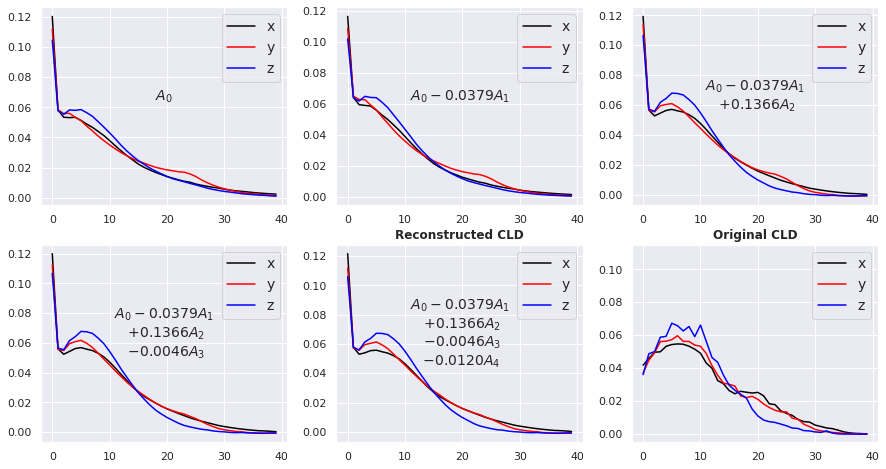

In [ ]:
# plot different states of reconstructions

z = pca.mean_
fig, axs = plt.subplots(2,3, figsize=(15, 8), facecolor='w', edgecolor='k')
recon_text=['$A_0$',
            '$A_0 -0.0379 A_1$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$\n $-0.0046 A_3$',
            '$A_0 -0.0379 A_1$\n $+0.1366 A_2$\n $-0.0046 A_3$\n $-0.0120 A_4$',
            ''
           ]
z=0
for i in range(2):
    for k in range(3):
        for j in range(3):
            axs[i,k].plot(range(CLD_length),CLD[z,:].reshape(3,CLD_length)[j,:],label=strlabel[j],color=colors[j]) 
        axs[i,k].legend(loc = 'upper right',prop={'size': 14})

        axs[i,k].text(0.5,0.55,recon_text[z],fontsize=14,
                      horizontalalignment='center', verticalalignment='center', transform=axs[i,k].transAxes)
        z = z+1

axs[1,2].set_ylim([-0.005,0.115])
axs[1,2].set_title('Original CLD',fontweight='heavy')
axs[1,1].set_title('Reconstructed CLD' ,fontweight='heavy')
plt.savefig("CLD reconstruction.png")  

## Index points of interest in 2D space for P-S discovery

In [ ]:
# merge X and y as numpy array

merged_pca_max_velo= np.column_stack((X_input[:,:], y_input_pca))   

In [ ]:
# keep only rows with maximum laserscan speed

pca_maxV =merged_pca_max_velo[merged_pca_max_velo[:, 2] == 16]
y_pca_maxV = pca_maxV[:,6:]

In [ ]:
# get the index number of interesting microstructure from PC space

max_PC1 = np.argmax(y_pca_maxV[:,0])
print(f"max PC1: row {max_PC1} in y_pca_maxV, row 525 in X_input_pca space (see next cell find_rows( ) )")

min_PC1 = np.argmin(y_pca_maxV[:,0])
print(f"min PC1: {min_PC1}")

max_PC2 = np.argmax(y_pca_maxV[:,1])
print(f"max PC2: {max_PC2}")

min_PC2 = np.argmin(y_pca_maxV[:,1])
print(f"min PC2: {min_PC2}")

max3_PC2 = []
max3_PC2.append(np.argsort(y_pca_maxV[:,1])[-3:])

min3_PC2 = []
min3_PC2.append(np.argsort(y_pca_maxV[:,1])[:3])

min3_PC2 = []
min3_PC2.append(np.argsort(y_pca_maxV[:,1])[:3])

max3_PC1 = []
max3_PC1.append(np.argsort(y_pca_maxV[:,0])[-3:])

print(f"top3 max PC2: {max3_PC2}")
print(f"top3 min PC2: {min3_PC2}")
print(f"top3 max PC1: {max3_PC1}")

max PC1: row 106 in y_pca_maxV, row 525 in X_input_pca space (see next cell find_rows( ) )
min PC1: 177
max PC2: 106
min PC2: 48
top3 max PC2: [array([151,  11, 106])]
top3 min PC2: [array([ 48,  50, 142])]
top3 max PC1: [array([150, 105, 106])]


In [ ]:
# find the index of row in process parameter space (X_input) equivalent to index in PCA space (pca_maxV)  

def find_rows(source, target):
    return np.where((source == target).all(axis=1))[0]

looking = pca_maxV[106,:6]

print(find_rows(source=X_input, target=looking))

[525]


In [ ]:
# get process parameters 

print(f"Process parameters of microstructure of interest: {X_train[69]}")
print(f"get PC scores of microstures of interest: {y_pca_maxV[0,:6],y_pca_maxV[106,:6],y_pca_maxV[177,:6],y_pca_maxV[48,:6]}")

Process parameters of microstructure of interest: [60. 40. 16. 25. 60.  5.]
get PC scores of microstures of interest: (array([ 0.12833023, -0.20917435,  0.12343667,  0.03895197,  0.02776332,
       -0.00752711]), array([ 0.56509067,  0.12177273, -0.03334844, -0.00638638, -0.03122268,
       -0.01088345]), array([-0.09191061, -0.10858407, -0.03924689, -0.02563805, -0.01123317,
        0.0048557 ]), array([ 0.10663021, -0.22799044,  0.11339011,  0.00603185,  0.00781869,
       -0.0128727 ]))


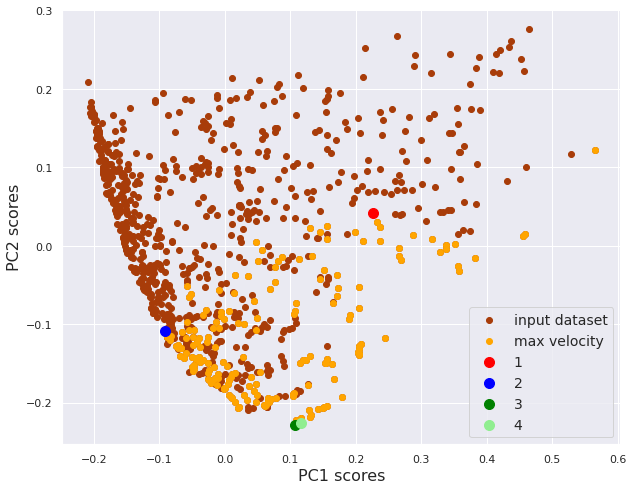

In [68]:
# scatter plot of PC1-PC2 of training and test data with indexed points of interest among points with max laserscan speed

fig = plt.figure(figsize=(10,8))
ax = plt.gca()    
c = ax.scatter(y_input_pca[:,0], y_input_pca[:,1], c='#a83c09', marker='o',label='input dataset')
c = ax.scatter(y_pca_maxV[:,0], y_pca_maxV[:,1], c='orange', marker='o',label='max velocity')
c = ax.scatter(y_pca_maxV[11,0], y_pca_maxV[11,1], c='red', marker='o',label='1',s=100)
#c = ax.scatter(y_input_pca[59,0], y_input_pca[59,1], c='red', marker='o',label='1',s=100)
c = ax.scatter(y_pca_maxV[177,0], y_pca_maxV[177,1], c='blue', marker='o',label='2',s=100)
c = ax.scatter(y_pca_maxV[48,0], y_pca_maxV[48,1], c='green', marker='o',label='3',s=100)
c = ax.scatter(y_pca_maxV[50,0], y_pca_maxV[50,1], c='lightgreen', marker='o',label='4',s=100)

ax.set_xlabel('PC1 scores',fontsize=16)
ax.set_ylabel('PC2 scores',fontsize=16)

ax.legend(loc = 'lower right',prop={'size': 14})

# Dimensionality reduction by kernel PCA

In [ ]:
# run the kernel pca decomposition

from sklearn.decomposition import KernelPCA

kpca = kernel_pca = KernelPCA(
    n_components=6, kernel="poly", gamma=10, fit_inverse_transform=True, alpha=0.1
)
y_train_kernel_pca = kernel_pca.fit(y_train).transform(y_train)

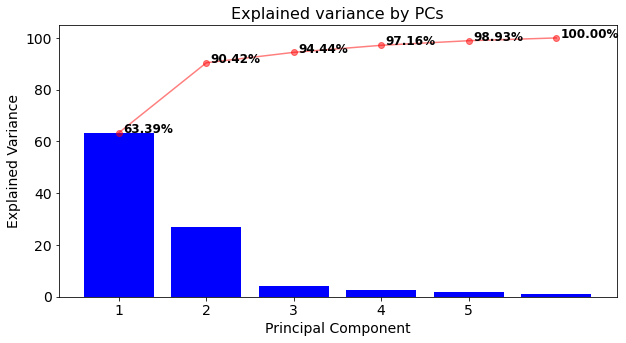

In [ ]:
# plot the pca result

fig = plt.figure(figsize=(10,5))

# preparing the data for the plot
n_comp = np.arange(1,y_train_kernel_pca.shape[1]+1,1)

kpca_transform = kpca.fit_transform(y_train)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

cumsum = np.cumsum(explained_variance_ratio*100)

# plot the explained varience and its sum
ax1 = plt.gca()
ax1.bar(n_comp, explained_variance_ratio*100,color='blue')
ax1.plot(n_comp, cumsum, '-ro', alpha=0.5)

# label the x-axis and y-axis
ax1.set_xlabel('Principal Component', fontsize=14)
ax1.set_ylabel('Explained Variance',fontsize=14)
ax1.set_title('Explained variance by PCs',fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
plt.xticks(np.arange(1,6,1))

# add the text label of the cumsum
formatted_weights = ['{:,.2%}'.format(x/100) for x in cumsum]
for i, txt in enumerate(formatted_weights):
    ax1.annotate(txt, (n_comp[i]+0.05, cumsum[i]), fontweight='heavy',fontsize=12)

plt.savefig("kernel_PCA_explained.png")    

# Dimensionality reduction by t-SNE

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(641, 3)
(641, 120)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


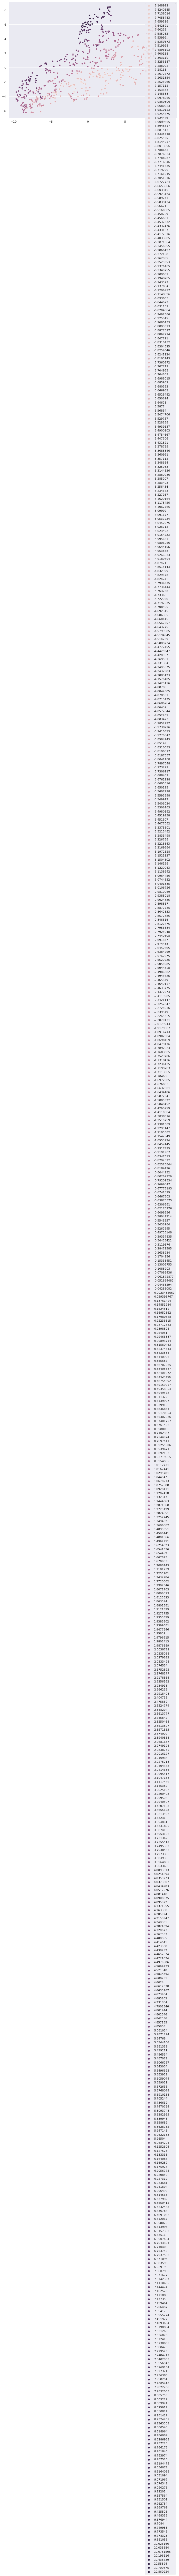

In [ ]:
# Apply t-SNE for reduction to 3 components

import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns


sns.set(rc={'figure.figsize':(11.7,8.27)})
#palette = sns.color_palette("bright", 10)

Y_embedded = TSNE(n_components=3, learning_rate='auto',
                  init='random').fit_transform(y_train)
print(Y_embedded.shape)
print(y_train.shape)

sns.scatterplot(Y_embedded[:,0], Y_embedded[:,1],Y_embedded[:,2], hue = X_train[:, 3], legend='full')

# Training of ML models to build Process-Structure linkage by regression

## 1) ML on linear PCA-reduced data



In [ ]:
# select number of PC components as target for multi-output-regression

pca = PCA(n_components=3)
pca.fit(y_train)
y_train_pca = pca.transform(y_train)

In [ ]:
# selected models allow multi-output regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm 
from sklearn.neural_network import MLPRegressor

# polynominal regression
poly = Pipeline([('poly',PolynomialFeatures(degree=4,interaction_only=False)),
                  ('linear',LinearRegression(fit_intercept=False))])

# random forest regression
RFregr = RandomForestRegressor(n_estimators=500,min_samples_split=2,max_features='sqrt',max_depth=8,random_state=0)

# kernel ridge regression
krr = KernelRidge(alpha=0.01,kernel="poly",gamma=0.01,degree=4)
# k-Nearest Neighbor regression
knn = KNeighborsRegressor(n_neighbors=3,weights='distance',p=1)

# support vector regression
svr = MultiOutputRegressor(
    svm.NuSVR(kernel='poly',degree=3,C=100,
            #gamma='scale',coef0=1,
            # nu = 0.5, tol=0.001,
            #shrinking=True, cache_size=500,
            #verbose=False, max_iter=- 1
            )
                          )
# multilayer perceptron
mlp = MLPRegressor(hidden_layer_sizes=(100,100,50,25),learning_rate='constant',
                  solver='adam',activation='tanh',alpha=0.1,max_iter=400,random_state=100
    )

# gradient boosting regression
reg = MultiOutputRegressor(GradientBoostingRegressor(random_state=5))

In [ ]:
# PCA 5-fold cross-validation for the SVR RF and polynomial

from sklearn.model_selection import ShuffleSplit, cross_val_score

score_poly = cross_val_score(poly,X=X_train,y=y_train_pca,cv=5)
score_svr = cross_val_score(svr,X=X_train,y=y_train_pca,cv=5)
score_RFregr = cross_val_score(RFregr,X=X_train,y=y_train_pca,cv=5)
score_mlp = cross_val_score(mlp,X=X_train,y=y_train_pca,cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


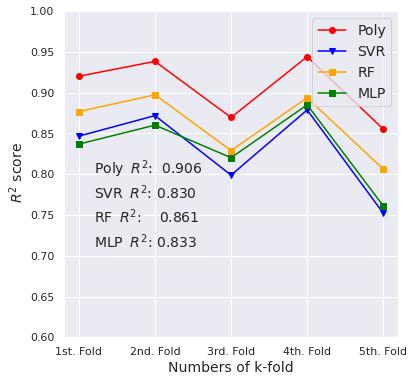

In [123]:
# plot the result of cross-validation

from google.colab import files

plt.figure(figsize=(6,6))
plt.plot(range(5),score_poly, 'red',marker='o',label='Poly')
plt.plot(range(5),score_svr,'blue',marker='v', label='SVR')
plt.plot(range(5),score_RFregr,'orange',marker='s', label='RF')
plt.plot(range(5),score_mlp,'green',marker='s', label='MLP')
plt.legend(loc = 'upper right',prop={'size': 14})
plt.xticks(np.arange(5),['1st. Fold','2nd. Fold','3rd. Fold','4th. Fold','5th. Fold'])
plt.ylim([0.6,1])
plt.text(0.2,0.80,'Poly $\:R^2$:  {:0.3f}'.format(np.mean(score_poly)),fontsize=14)
plt.text(0.2,0.77,'SVR $\:R^2$: {:0.3f}'.format(np.mean(score_svr)),fontsize=14)
plt.text(0.2,0.74,'RF $\:R^2$:    {:0.3f}'.format(np.mean(score_RFregr)),fontsize=14)
plt.text(0.2,0.71,'MLP $\:R^2$: {:0.3f}'.format(np.mean(score_mlp)),fontsize=14)
plt.xlabel('Numbers of k-fold',fontsize=14)
plt.ylabel('$\:R^2$ score',fontsize=14)
plt.savefig("ML_pca.png", transparent=False)

## 2) ML on kernel PCA-reduced data


In [112]:
# select number of PC components as target for multi-output-regression

kpca = kernel_pca = KernelPCA(
    n_components=3, kernel="poly", gamma=10, fit_inverse_transform=True, alpha=0.1
)
y_train_kernel_pca = kernel_pca.fit(y_train).transform(y_train)

In [ ]:
# kernel PCA 5-fold cross-validation for the SVR, RF, MLP and polynomial

from sklearn.model_selection import ShuffleSplit, cross_val_score

score_poly_k = cross_val_score(poly,X=X_train,y=y_train_kernel_pca,cv=5)
score_svr_k = cross_val_score(svr,X=X_train,y=y_train_kernel_pca,cv=5)
score_RFregr_k = cross_val_score(RFregr,X=X_train,y=y_train_kernel_pca,cv=5)
score_mlp_k = cross_val_score(mlp,X=X_train,y=y_train_kernel_pca,cv=5)

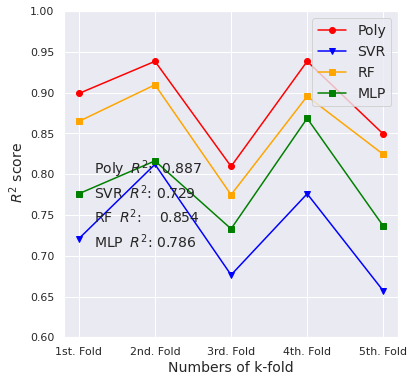

In [122]:
# plot the result of cross-validation

plt.figure(figsize=(6,6))
plt.plot(range(5),score_poly_k, 'red',marker='o',label='Poly')
plt.plot(range(5),score_svr_k,'blue',marker='v', label='SVR')
plt.plot(range(5),score_RFregr_k,'orange',marker='s', label='RF')
plt.plot(range(5),score_mlp_k,'green',marker='s', label='MLP')
plt.legend(loc = 'upper right',prop={'size': 14})
plt.xticks(np.arange(5),['1st. Fold','2nd. Fold','3rd. Fold','4th. Fold','5th. Fold'])
plt.ylim([0.6,1])
plt.text(0.2,0.80,'Poly $\:R^2$:  {:0.3f}'.format(np.mean(score_poly_k)),fontsize=14)
plt.text(0.2,0.77,'SVR $\:R^2$: {:0.3f}'.format(np.mean(score_svr_k)),fontsize=14)
plt.text(0.2,0.74,'RF $\:R^2$:    {:0.3f}'.format(np.mean(score_RFregr_k)),fontsize=14)
plt.text(0.2,0.71,'MLP $\:R^2$: {:0.3f}'.format(np.mean(score_mlp_k)),fontsize=14)
plt.xlabel('Numbers of k-fold',fontsize=14)
plt.ylabel('$\:R^2$ score',fontsize=14)
plt.savefig("ML_kpca.png", transparent=False)

## 3) ML on t-SNE-reduced data

In [ ]:
# select number of PC components as target for multi-output-regression

Y_embedded = TSNE(n_components=3, learning_rate='auto',
                  init='random').fit_transform(y_train)

In [ ]:
# t-SNE 5-fold cross-validation for the SVR, RF, MLP and polynomial

from sklearn.model_selection import ShuffleSplit, cross_val_score

score_poly_t = cross_val_score(poly, X = X_train, y = Y_embedded, cv=5)
score_svr_t = cross_val_score(svr, X = X_train, y = Y_embedded, cv=5)
score_RFregr_t = cross_val_score(reg, X = X_train, y = Y_embedded, cv=5)
score_mlp_t = cross_val_score(mlp, X = X_train, y = Y_embedded, cv=5)

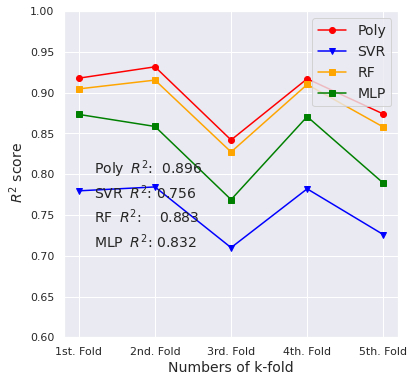

In [121]:
# plot the result of cross-validation
plt.figure(figsize=(6,6))
plt.plot(range(5),score_poly_t, 'red',marker='o',label='Poly')
plt.plot(range(5),score_svr_t,'blue',marker='v', label='SVR')
plt.plot(range(5),score_RFregr_t,'orange',marker='s', label='RF')
plt.plot(range(5),score_mlp_t,'green',marker='s', label='MLP')
plt.legend(loc = 'upper right',prop={'size': 14})
plt.xticks(np.arange(5),['1st. Fold','2nd. Fold','3rd. Fold','4th. Fold','5th. Fold'])
plt.ylim([0.6,1])
plt.text(0.2,0.80,'Poly $\:R^2$:  {:0.3f}'.format(np.mean(score_poly_t)),fontsize=14)
plt.text(0.2,0.77,'SVR $\:R^2$: {:0.3f}'.format(np.mean(score_svr_t)),fontsize=14)
plt.text(0.2,0.74,'RF $\:R^2$:    {:0.3f}'.format(np.mean(score_RFregr_t)),fontsize=14)
plt.text(0.2,0.71,'MLP $\:R^2$: {:0.3f}'.format(np.mean(score_mlp_t)),fontsize=14)
plt.xlabel('Numbers of k-fold',fontsize=14)
plt.ylabel('$\:R^2$ score',fontsize=14)
plt.savefig("ML_tsne.png", transparent=False) 

### tuning the hyperparameters of polynomial regression

Text(0, 0.5, 'R2 score')

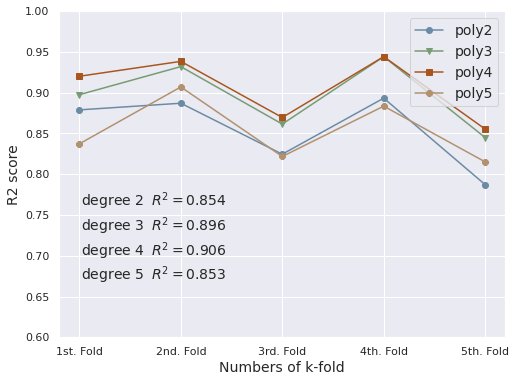

In [ ]:
# 5-fold cross-validation for the polynomial tuning

from sklearn.model_selection import ShuffleSplit, cross_val_score

poly2 = Pipeline([('poly', PolynomialFeatures(degree=2, interaction_only=False)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly3 = Pipeline([('poly', PolynomialFeatures(degree=3, interaction_only=False)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly4 = Pipeline([('poly', PolynomialFeatures(degree=4, interaction_only=False)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly5 = Pipeline([('poly', PolynomialFeatures(degree=5, interaction_only=False)),
                  ('linear', LinearRegression(fit_intercept=False))])


score2 = cross_val_score(poly2, X = X_train, y = y_train_pca, cv=5)
score3 = cross_val_score(poly3, X = X_train, y = y_train_pca, cv=5)
score4 = cross_val_score(poly4, X = X_train, y = y_train_pca, cv=5)
score5 = cross_val_score(poly5, X = X_train, y = y_train_pca, cv=5)

# plot the result of cross-validation
plt.figure(figsize=(8,6))
plt.plot(range(5),score2, '#6b8ba4',marker='o',label='poly2')
plt.plot(range(5),score3,'#789b73',marker='v', label='poly3')
plt.plot(range(5),score4,'#a9561e',marker='s', label='poly4')
plt.plot(range(5),score5,'#b1916e',marker='8', label='poly5')


plt.legend(loc = 'upper right',prop={'size': 14})
plt.xticks(np.arange(5),['1st. Fold','2nd. Fold','3rd. Fold','4th. Fold','5th. Fold'])
plt.ylim([0.6,1])
text = ('degree 2 $\:R^2 = {:0.3f}$ \n'\
        'degree 3 $\:R^2 = {:0.3f}$ \n'\
        'degree 4 $\:R^2 = {:0.3f}$ \n'\
        'degree 5 $\:R^2 = {:0.3f}$ \n'       
        .format(np.mean(score2),
                np.mean(score3),
                np.mean(score4),
                np.mean(score5)
                            
               )
       )
plt.gca().text(0.05, 0.45, text,transform=plt.gca().transAxes,
               fontsize=14, verticalalignment='top')
plt.xlabel('Numbers of k-fold',fontsize=14)
plt.ylabel('R2 score',fontsize=14)

### plot the training data in th parity plot

Text(0, 0.5, 'Prediction')

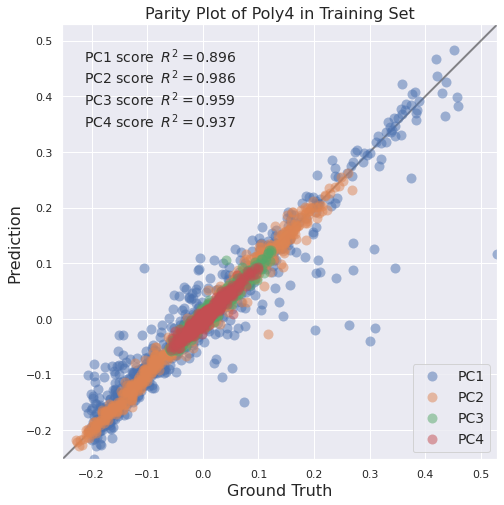

In [ ]:
from sklearn.metrics import r2_score

poly4.fit(X = X_train, y = y_train_pca)
y_pred4 = poly4.predict(X_train)


# Plot Figures
fignow = plt.figure(figsize=(8,8))

x = y_train_pca
y = y_pred4 #.reshape(1,-1) # ypreds from loo results, y_pred from the whole test data 


## find the boundaries of X and Y values
bounds = (min(x.min(), y.min()) - int(0.1 * y.min()), max(x.max(), y.max())+ int(0.1 * y.max()))

# Reset the limits
ax = plt.gca()
ax.set_xlim(bounds)
ax.set_ylim(bounds)
# Ensure the aspect ratio is square
ax.set_aspect("equal", adjustable="box")
ax.plot([0, 1], [0, 1], "k-", alpha=0.5 ,lw=2 ,transform=ax.transAxes)
plt.plot(x[:,0],y[:,0],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC1')
plt.plot(x[:,1],y[:,1],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC2')
plt.plot(x[:,2],y[:,2],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC3')
plt.plot(x[:,3],y[:,3],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC4')
# Calculate Statistics of the Parity Plot 

text = ('PC1 score $\:R^2 = {:0.3f}$ \n'\
        'PC2 score $\:R^2 = {:0.3f}$ \n'\
        'PC3 score $\:R^2 = {:0.3f}$ \n'\
        'PC4 score $\:R^2 = {:0.3f}$ \n'\
        
        .format(r2_score(x[:,0],y[:,0]),
                r2_score(x[:,1],y[:,1]),
                r2_score(x[:,2],y[:,2]),
                r2_score(x[:,3],y[:,3]),
               
               
               )
       )

plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
               fontsize=14, verticalalignment='top')
plt.legend(loc = 'lower right',prop={'size': 14})
#loc = 'upper left', 'upper right', 'lower left', 'lower right' 
#
#
# Title and labels 
plt.title("Parity Plot of Poly4 in Training Set",fontsize=16)
plt.xlabel('Ground Truth',fontsize=16)
plt.ylabel('Prediction',fontsize=16)
#plt.savefig("trainset_poly4.png") 

### plot the test data in th parity plot

Text(0, 0.5, 'Prediction')

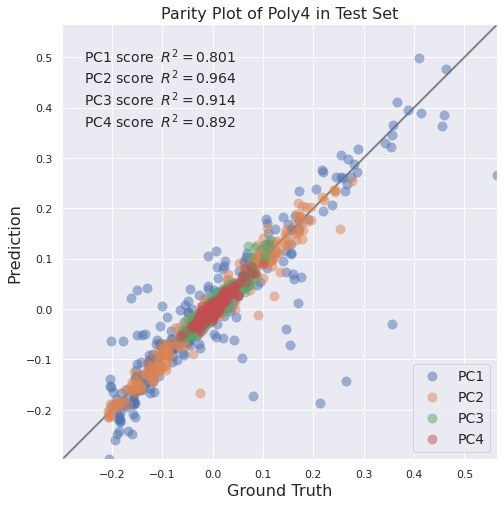

In [ ]:
# pca transform the test data
y_test_pca = pca.transform(y_test)


from sklearn.metrics import r2_score

y_pred_test =poly4.predict(X_test)

# Plot Figures
fignow = plt.figure(figsize=(8,8))

x = y_test_pca

y = y_pred_test

## find the boundaries of X and Y values
bounds = (min(x.min(), y.min()) - int(0.1 * y.min()), max(x.max(), y.max())+ int(0.1 * y.max()))

# Reset the limits
ax = plt.gca()
ax.set_xlim(bounds)
ax.set_ylim(bounds)
# Ensure the aspect ratio is square
ax.set_aspect("equal", adjustable="box")

ax.plot([0, 1], [0, 1], "k-", alpha=0.5 ,lw=2 ,transform=ax.transAxes)
plt.plot(x[:,0],y[:,0],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC1')
plt.plot(x[:,1],y[:,1],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC2')
plt.plot(x[:,2],y[:,2],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC3')
plt.plot(x[:,3],y[:,3],"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label='PC4')

# Calculate Statistics of the Parity Plot 

text = ('PC1 score $\:R^2 = {:0.3f}$ \n'\
        'PC2 score $\:R^2 = {:0.3f}$ \n'\
        'PC3 score $\:R^2 = {:0.3f}$ \n'\
        'PC4 score $\:R^2 = {:0.3f}$ \n'\
        
        .format(r2_score(x[:,0],y[:,0]),
                r2_score(x[:,1],y[:,1]),
                r2_score(x[:,2],y[:,2]),
                r2_score(x[:,3],y[:,3]),
               
               
               )
       )
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
plt.legend(loc = 'lower right',prop={'size': 14})
# Title and labels 
plt.title("Parity Plot of Poly4 in Test Set",fontsize=16)
plt.xlabel('Ground Truth',fontsize=16)
plt.ylabel('Prediction',fontsize=16)
#plt.savefig("testset_poly3.png") 

# reconstruction of CLD and their MAE

### Mean absolute error:
 $$MAE = (\frac{1}{n*\bar{y}_{i}})\sum_{i=1}^{n}\left | y_{i} - \hat{y}_{i} \right |$$

### histgram of the MAE

In [ ]:
y_preds_test_pca = poly4.predict(X_test)
y_reconstruct = pca.inverse_transform(y_preds_test_pca)
MAE = np.abs(y_reconstruct-y_test)
MAE_si = np.sum(MAE, axis=1)/(MAE.shape[1]-1)
MAE_normalized = MAE_si/np.mean(y_reconstruct)
large_MAE = np.argwhere(MAE_normalized > 0.2 ).reshape(1,-1)
print(large_MAE,large_MAE.shape)
print(np.argmax(MAE_normalized),np.max(MAE_normalized))

[[ 19  39  54  56  59  65  71 114 120 123 135 138 148 154 164 211 216 255
  259 260]] (1, 20)
259 0.5308908341356221


Text(0, 0.5, 'Numbers of Structures')

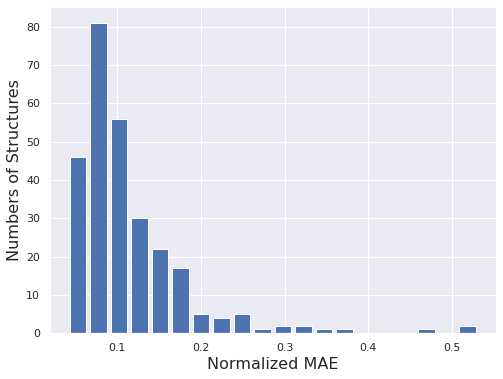

In [ ]:
# plot the histogram

plt.figure(figsize=(8,6))
plt.hist(MAE_normalized , bins=20,histtype = 'bar', align = 'mid',rwidth = 0.8 )
plt.xlabel('Normalized MAE',fontsize=16)
plt.ylabel('Numbers of Structures',fontsize=16)
#plt.savefig("hist of MAE.png") 

### the representitive mean absolute error(around 171 in 264 test set)

(128,)
107


(0.0, 40.0)

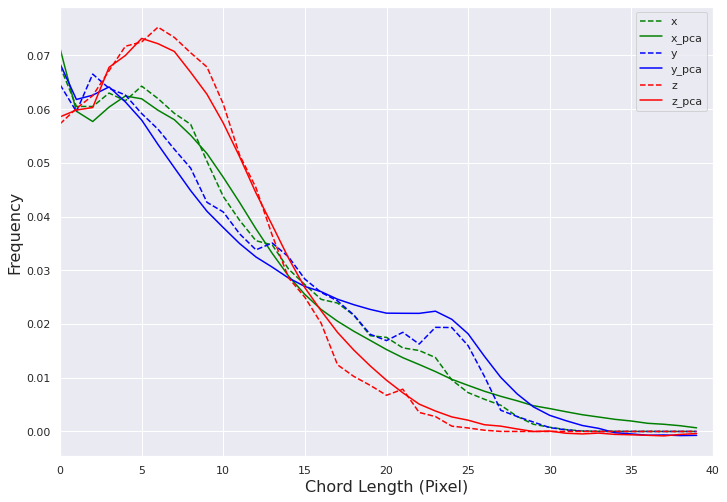

In [ ]:
# obtain the frequent data set

threshold_min = np.argwhere(MAE_si > 0.002 ).reshape(1,-1)
threshold_max =  np.argwhere(MAE_si < 0.004 ).reshape(1,-1)
frequent = np.intersect1d(threshold_min,threshold_max)
print(frequent.shape)

# select 3 data
#c = random.choice(frequent)
c = 107
#c = 92
colors =["green","blue","red"]
print(c)
# plot the selected data
#fig, axs = plt.plot(2,1, figsize=(8, 12), facecolor='w', edgecolor='k')
strlabel = ['x','y','z']
strlabel2 = ['x_pca','y_pca','z_pca']
CLD_length =int(y_pca_PC.shape[1]/3)
for j in range(3):
    plt.plot(range(CLD_length),y_test[c,:].reshape(3,CLD_length)[j,:],label=strlabel[j], linestyle='dashed', color =colors[j]) 
    plt.plot(range(CLD_length),y_reconstruct[c,:].reshape(3,CLD_length)[j,:],label=strlabel2[j], color =colors[j]) 
    #plt.plot(range(CLD_length),CLD[z,:].reshape(3,CLD_length)[j,:],label=strlabel[j]) 
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Chord Length (Pixel)',fontsize=16)
plt.legend()
plt.xlim([0,40])
#plt.savefig("representitive MAE.png") 

# Calculate SHAP values for interpretable model output after [coryroyce](https://github.com/coryroyce)
 

Create data

In [ ]:
import random
import pandas as pd
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.


(641, 3)
(641, 120)


Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


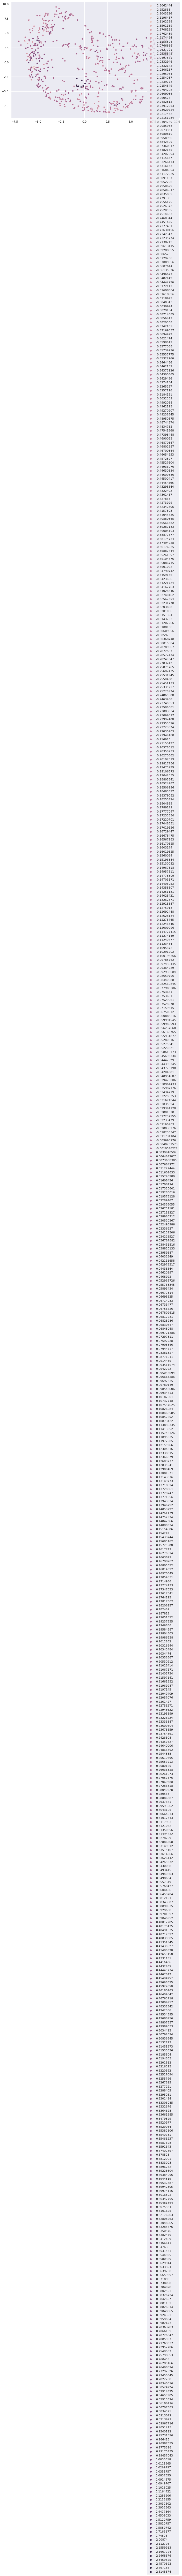

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns


sns.set(rc={'figure.figsize':(11.7,8.27)})
# palette = sns.color_palette("bright", 10)

Y_embedded = TSNE(n_components=3, learning_rate='auto', perplexity = 50, 
                  init='pca').fit_transform(y_train)
print(Y_embedded.shape)
print(y_train.shape)

sns.scatterplot(Y_embedded[:,0], Y_embedded[:,1],Y_embedded[:,2], hue = X_train[:, 3], legend='full')

In [ ]:
def get_dataset():
  # Create sample data with sklearn make_regression function
  #X, y = make_regression(n_samples=1000, n_features=10, n_informative=7, n_targets=5, random_state=0)

  # Convert the data into Pandas Dataframes for easier maniplution and keeping stored column names
  # Create feature column names
  feature_cols = ['rotation','width','velocity','depth','length','HAZ']
  
  df_features = pd.DataFrame(data = X_train, columns = feature_cols)               

  # Create lable column names and dataframe
  label_cols = ['PC1', 'PC2', 'PC3']

  df_labels = pd.DataFrame(data = Y_embedded, columns = label_cols)

  return df_features, df_labels

Create model

In [ ]:

def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(100, input_dim=n_inputs, kernel_initializer='he_uniform', activation='tanh'))
	model.add(Dense(100, input_dim=n_inputs, kernel_initializer='he_uniform',  activation='tanh'))
	model.add(Dense(50, input_dim=n_inputs, kernel_initializer='he_uniform', activation='tanh'))
	model.add(Dense(25, input_dim=n_inputs, kernel_initializer='he_uniform', activation='tanh'))
	model.add(Dense(n_outputs, kernel_initializer='he_uniform'))
	model.compile(loss='mae', optimizer='adam')
	return model

Train model

In [ ]:
# Create the datasets
X, y = get_dataset()

# Get the number of inputs and outputs from the dataset
n_inputs, n_outputs = X.shape[1], y.shape[1]

In [ ]:
#use Keras model (otherwise continue with mlp below)
model = get_model(n_inputs, n_outputs)

In [ ]:
model.fit(X, y, verbose=0, epochs=200)

In [ ]:
model.evaluate(x = X, y = y)

21/21 [==============================] - 0s 2ms/step - loss: 0.9505


0.950542688369751

In [ ]:
#use mlp instead of Keras model
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(hidden_layer_sizes=(100, 100, 50, 25),learning_rate='constant',
                  solver='adam',activation='tanh',alpha=0.1, max_iter=400, random_state=0
    )


In [ ]:
mlp.fit(X, y)

MLPRegressor(activation='tanh', alpha=0.1,
             hidden_layer_sizes=(100, 100, 50, 25), max_iter=400,
             random_state=0)

In [ ]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
score_mlp = cross_val_score(mlp, X = X_train, y = Y_embedded, cv=5)

In [ ]:
score_mlp 

array([0.68134724, 0.65459986, 0.56842625, 0.56357304, 0.60575345])

# model prediction

In [ ]:
mlp.predict(X.iloc[0:1,:])

array([[-1.32293841, 10.51972314, -2.96515691]])

# Get SHAP values

In [ ]:
# print the JS visualization code to the notebook

import shap

shap.initjs()

In [ ]:
# set the explainer using the Kernel Explainer (Model agnostic explainer method form SHAP)
explainer = shap.KernelExplainer(model = model.predict, data = X.head(50), link = "identity")

2/2 [==============================] - 0s 7ms/step


In [ ]:
# set the index of the specific example to explain
X_idx = 0

shap_value_single = explainer.shap_values(X = X.iloc[X_idx:X_idx+1,:], nsamples = 100)

  0%|          | 0/1 [00:00<?, ?it/s]

97/97 [==============================] - 0s 2ms/step


In [ ]:
X.iloc[X_idx:X_idx+1,:]

rotation  width  velocity  depth  length  HAZ
0       0.0   40.0      16.0   25.0    40.0  5.0

In [ ]:
from ipywidgets import IntProgress,widgets

In [ ]:
#Choose the label/output/target to run individual explanations on 
#Create the list of all labels for the drop down list
list_of_labels = y.columns.to_list()

# Create a list of tuples so that the index of the label is what is returned
tuple_of_labels = list(zip(list_of_labels, range(len(list_of_labels))))

# Create a widget for the labels and then display the widget
current_label = widgets.Dropdown(options=tuple_of_labels,
                              value=0,
                              description='Select Label:'
                              )

# Display the dropdown list (Note: access index value with 'current_label.value')
current_label


Dropdown(description='Select Label:', options=(('PC1', 0), ('PC2', 1), ('PC3', 2)), value=0)

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f'Current label Shown: {list_of_labels[current_label.value]}')

shap.force_plot(base_value = explainer.expected_value[current_label.value],
                shap_values = shap_value_single[current_label.value], 
                features = X.iloc[X_idx:X_idx+1,:]
                )

Current label Shown: PC1


In [ ]:
# Note: We are limiting to the first 50 training examples since it takes time to calculate the full number of sampels

shap_values = explainer.shap_values(X = X.iloc[0:50,:], nsamples = 100)

  0%|          | 0/50 [00:00<?, ?it/s]

97/97 [==============================] - 0s 2ms/step


Current Label Shown: PC1



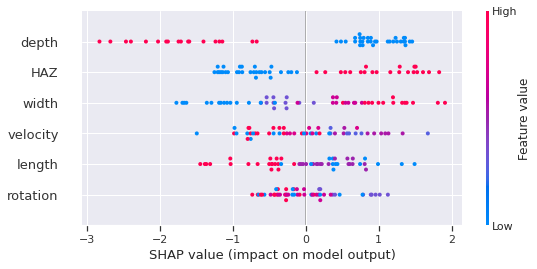

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f'Current Label Shown: {list_of_labels[current_label.value]}\n')

shap.summary_plot(shap_values = shap_values[current_label.value],
                  features = X.iloc[0:50,:]
                  ) 


In [ ]:
print(f'Current Label Shown: {list_of_labels[current_label.value]}\n')

# print the JS visualization code to the notebook
shap.initjs()

shap.force_plot(base_value = explainer.expected_value[current_label.value],
                shap_values = shap_values[current_label.value], 
                features = X.iloc[0:50,:]
                )

Current Label Shown: PC1

